In [3]:
import pandas as pd
df = pd.read_csv('../data/籌碼數據-2年_filtered.csv')
df.head()

,stock_name,stock_symbol,foreign_investor_bought,foreign_investor_sold,investment_trust_bought,investment_trust_sold,dealer_bought,dealer_sold,date
0,台船,2208,2788000,736000,1000,0,31296,27000,2023-06-29 00:00:00
1,台船,2208,1462000,720000,3000,0,47908,7000,2023-06-28 00:00:00
2,台船,2208,465000,520000,0,0,37000,1947,2023-06-27 00:00:00
3,台船,2208,203101,312000,2000,0,15000,3853,2023-06-26 00:00:00
4,台船,2208,595000,228000,0,0,4000,82000,2023-06-21 00:00:00


In [8]:
# Aggregate all by date
df_grouped = df.groupby('date').sum()
df_grouped = df_grouped.reset_index()
df_grouped.head()

# Drop the stock_name column
df_grouped = df_grouped.drop(columns=['stock_name'])
df_grouped.head()

# Drop the stock_symbol column
df_grouped = df_grouped.drop(columns=['stock_symbol'])
df_grouped.head()

# Compute surplus
df_grouped['foreign_investor_surplus'] = df_grouped['foreign_investor_bought'] - df_grouped['foreign_investor_sold']
df_grouped['investment_trust_surplus'] = df_grouped['investment_trust_bought'] - df_grouped['investment_trust_sold']
df_grouped['dealer_surplus'] = df_grouped['dealer_bought'] - df_grouped['dealer_sold']

df_grouped.head()


,date,foreign_investor_bought,foreign_investor_sold,investment_trust_bought,investment_trust_sold,dealer_bought,dealer_sold,foreign_investor_surplus,investment_trust_surplus,dealer_surplus
0,2022-03-01 00:00:00,202041443,161145739,6949000,702000,33712391,20291973,40895704,6247000,13420418
1,2022-03-02 00:00:00,134740634,192745141,6069000,1056000,26743003,17750287,-58004507,5013000,8992716
2,2022-03-03 00:00:00,208513376,163165348,3670000,9000,42451645,17275480,45348028,3661000,25176165
3,2022-03-04 00:00:00,234347889,235213044,14442000,134000,27269163,33227321,-865155,14308000,-5958158
4,2022-03-07 00:00:00,201822726,264337485,4165000,1514000,27245532,49040879,-62514759,2651000,-21795347


In [10]:
df_grouped = df_grouped[['date', 'foreign_investor_surplus', 'investment_trust_surplus', 'dealer_surplus']]
df_grouped.head()

,date,foreign_investor_surplus,investment_trust_surplus,dealer_surplus
0,2022-03-01 00:00:00,40895704,6247000,13420418
1,2022-03-02 00:00:00,-58004507,5013000,8992716
2,2022-03-03 00:00:00,45348028,3661000,25176165
3,2022-03-04 00:00:00,-865155,14308000,-5958158
4,2022-03-07 00:00:00,-62514759,2651000,-21795347


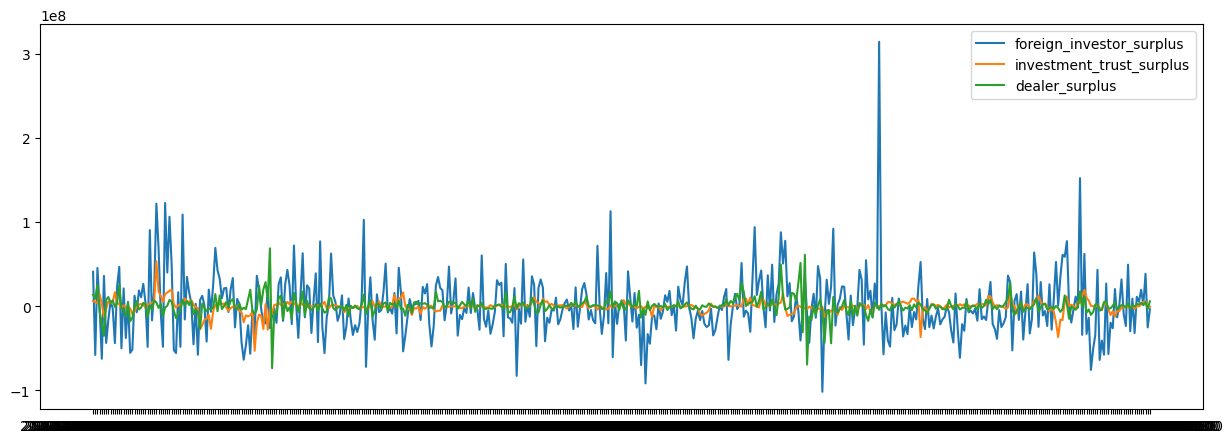

In [11]:
# Plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(df_grouped['date'], df_grouped['foreign_investor_surplus'], label='foreign_investor_surplus')
plt.plot(df_grouped['date'], df_grouped['investment_trust_surplus'], label='investment_trust_surplus')
plt.plot(df_grouped['date'], df_grouped['dealer_surplus'], label='dealer_surplus')
plt.legend()
plt.show()


In [12]:
# Save the data
df_grouped.to_csv('../data/籌碼數據-2年_by_date.csv', index=False)
